<a href="https://colab.research.google.com/github/dwonn201/KaggleStudy/blob/master/11_Football_Match_Probability_Prediction/Football_Match_Probability_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football Match Probability Prediction
--------------------
#### Predict the probability results of the beautiful game
https://www.kaggle.com/c/football-match-probability-prediction/overview

## Competition Description

경기를 하는 2팀의 가장 최근 폼을 기반으로 경기 결과 예측하기.  
각 팀의 폼은 그들의 가장 최근 경기 결과를 바탕으로 보여질 수 있음.  
그 결과 두 팀간의 경기 결과 확률은 그들의 경기 스케쥴에 따라 달라질 수 있음
## 데이터 소개
(https://www.kaggle.com/c/football-match-probability-prediction/data?select=train.csv)

    - 이번 주제는 축구경기 승/패/무 확률 예측입니다.

    - 다음 3개의 csv 파일을 사용합니다.
    train.csv
    test.csv
    sample_submission.csv
    
    - 각 파일의 컬럼 크게 3가지 파트로 구분되며, 내용은 아래와 같습니다.
    

**Descriptive columns**

    'target'- home/away/draw 3가지 값을 가지고 있음. train set에서만 사용 가능
    'home_team_name'- 홈팀명.
    'away_team_name'- 어웨이팀명.
    'match_date'- 경기일 (UTC).
    'league_name'	- 리그명 ex) Premier Leage(영국 프리미어리그), Club Friendlies(친선경기) 등 .
    'league_id'- 리그ID. 
    'is_cup'- 컵대회 여부. 값이 1일 경우 컵대회
    'home_team_coach_id'	- 홈팀 코치ID.
    'away_team_coach_id'	- 어웨이팀 코치ID.

**Historical home team features**

    'home_team_history_match_date_{i}'	- 홈팀 최근 i번째 경기 일자. 
    'home_team_history_is_play_home_{i}'- 홈 경기 여부. 값이 1일 경우 홈팀 홈에서 경기. 
    'home_team_history_is_cup_{i}'- 홈팀 컵대회 경기 여부. 값이 1일 경우 컵대회 경기.
    'home_team_history_goal_{i}'- 최근 i번째 경기에서 득점한 골 수.
    'home_team_history_opponent_goal_ {i}'- 최근 i번째 경기에서 상대팀이 득점한 골 수.
    'home_team_history_rating_{i}'- 최근 i번째 경기 홈팀 rating (경기 전 rating).
    'home_team_history_opponent_rating_{i}'- 최근 i번째 경기에서 상대팀이 홈팀 상대 rating (경기 전 rating).
    'home_team_history_coach_{i}'- 최근 i번째 경기 코치 id
    'home_team_history_league_id_{i}'- 최근 i번째 경기 홈팀 리그 명.

**Historical away team features**  

    'away_team_history_match_date_{i}'- 어웨이팀 최근 i번째 경기 일자. 
    'away_team_history_is_play_home_{i}'- 홈 경기 여부. 값이 1일 경우 어웨이팀 홈에서 경기. 
    'away_team_history_is_cup_{i}'- 어웨이팀 컵대회 경기 여부. 값이 1일 경우 컵대회 경기.
    'away_team_history_goal_{i}'- 어웨이팀 최근 i번째 경기에서 득점한 골 수.
    'away_team_history_opponentgoal{i}'- 어웨이팀 최근 i번째 경기에서 상대팀이 득점한 골 수.
    'away_team_history_rating_{i}'- 어웨이팀 최근 i번째 경기 rating (경기 전 rating).
    'away_team_history_opponent_rating{i}'- 어웨이팀 최근 i번째 경기에서 상대팀 rating (경기 전 rating).
    'away_team_historycoach{i}'- 어웨이팀 최근 i번째 경기 코치 id
    'away_team_history_league_id_{i}'- 어웨이팀 최근 i번째 경기 리그 명.


#### What are the rating features?
* rating 변수들은 [Octosport](https://www.octosport.io/)라는 곳에서 계산된 점수입니다. Rating이란 해당 경기에서 팀이 가진 상대적 강점에 대한 정보를 제공합니다.  
* 예를 들어, 한 팀의 rating이 10.5 이고, 다른 팀의 rating이 2.5 라면, 10.5의 팀이 2.5의 팀을 이기기를 기대합니다.


## Step 1. 데이터셋 준비하기

### 1. Colab Notebook에 Kaggle API 세팅


In [76]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('max_rows', 200)

In [77]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = '' 


### 2. 데이터 다운로드 및 압축 해제

In [78]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드 및 압축 해제
!rm *.*
!kaggle competitions download -c football-match-probability-prediction
!unzip '*.zip'

 49% 13.0M/26.3M [00:00<00:00, 135MB/s]
100% 26.3M/26.3M [00:00<00:00, 168MB/s]
  0% 0.00/246k [00:00<?, ?B/s]
100% 246k/246k [00:00<00:00, 79.9MB/s]
 83% 33.0M/39.5M [00:01<00:00, 19.8MB/s]
100% 39.5M/39.5M [00:01<00:00, 30.3MB/s]
Archive:  train.csv.zip
  inflating: train.csv               

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  test.csv.zip
  inflating: test.csv                

3 archives were successfully processed.


### 3. data 불러오기


In [79]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
print(train.shape)
train.head()

(110938, 190)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,2019-11-10 18:30:00,2019-11-03 18:30:00,2019-10-29 22:10:00,2019-10-19 20:45:00,2019-10-04 22:00:00,2019-09-28 23:00:00,2019-09-22 14:00:00,2019-09-15 18:30:00,2019-09-01 16:15:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.598000,11.825567,9.374867,8.265660,10.769583,4.680350,6.429871,12.773025,10.970814,5.924407,5.253225,2.819962,3.114820,3.283603,2.574183,5.887331,4.570225,2.843268,3.057739,4.684664,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,2019-11-24 01:00:00,2019-11-10 01:00:00,2019-11-02 21:30:00,2019-10-27 01:00:00,2019-10-24 01:00:00,2019-10-21 00:00:00,2019-10-18 01:00:00,2019-10-06 01:00:00,2019-09-29 21:00:00,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.000588,4.692008,4.461575,5.301500,8.290211,5.260700,4.928100,5.708921,4.125842,4.103719,6.881762,6.840558,8.700363,5.156150,3.864878,6.237028,6.871904,5.716200,7.960465,9.994456,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,2019-11-21 01:30:00,2019-11-03 21:30:00,2019-10-27 01:00:00,2019-10-20 22:00:00,2019-10-17 01:00:00,2019-10-05 21:00:00,2019-09-29 01:00:00,2019-09-22 22:00:00,2019-09-19 01:00:00,

In [81]:
print(test.shape)
test.head()

(72711, 189)


,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,12 de Octubre,Sportivo Luqueño,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,2021-04-23 23:00:00,2021-04-21 00:30:00,2021-04-17 00:15:00,2021-04-11 00:30:00,2021-04-06 22:15:00,2021-04-01 22:15:00,2021-03-20 22:00:00,2021-03-16 22:15:00,2021-03-13 21:30:00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,6.038947,4.514535,4.437450,4.589986,3.701850,4.521075,4.972890,3.150812,7.084988,5.106171,4.721590,6.953965,6.535228,5.782611,7.538950,8.428800,4.922229,6.796484,3.809293,6.721784,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,Necaxa,Atlas,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,2021-04-17 00:30:00,2021-04-10 00:30:00,2021-04-04 01:00:00,2021-03-20 01:00:00,2021-03-16 03:00:00,2021-03-08 01:06:00,2021-03-05 01:00:00,2021-02-27 01:30:00,2021-02-20 01:30:00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.603333,5.947966,6.384433,6.715850,4.679800,5.040744,6.765418,6.203948,4.995129,5.517792,4.459100,4.543053,4.861583,5.082300,9.011000,6.621075,4.141575,5.056690,6.625557,5.895073,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,Sertãozinho,EC São Bernardo,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,2021-04-24 23:00:00,2021-04-22 23:00:00,2021-04-21 01:00:00,2021-03-14 18:00:00,2021-03-10 18:00:00,2021-03-07 13:00:00,2021-02-28 13:00:00,2020-08-30 14:00:00,2020-08-26 18:00:00,1.0,0.0,1.

In [82]:
train.describe()

,id,league_id,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
count,1.109380e+05,110938.000000,8.921700e+04,8.912300e+04,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,101643.000000,100219.000000,98802.000000,97379.000000,109725.000000,108381.000000,107025.000000,105639.000000,104190.000000,102707.000000,101218.000000,99675.000000,98208.000000,96752.000000,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,101643.000000,100219.000000,98802.000000,97379.000000,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,...,109699.000000,108335.000000,106891.000000,105413.000000,103922.000000,102501.000000,101060.000000,99635.000000,98166.000000,96715.000000,109699.000000,108335.000000,106891.000000,105413.000000,103922.000000,102501.000000,101060.000000,99635.000000,98166.000000,96715.000000,8.929700e+04,8.924200e+04,8.898900e+04,8.864400e+04,8.808300e+04,8.741300e+04,8.656100e+04,8.571900e+04,8.478800e+04,8.380900e+04,109712.000000,108345.000000,106904.000000,105422.000000,103938.000000,102512.000000,101071.000000,99643.000000,98176.000000,96722.000000
mean,1.519875e+07,910.457012,1.287134e+07,1.291552e+07,0.306944,0.567801,0.466141,0.519469,0.487857,0.507288,0.497624,0.502060,0.500962,0.498958,0.083199,0.083742,0.083205,0.084240,0.084883,0.084512,0.085202,0.083421,0.085869,0.085900,1.343299,1.409966,1.383353,1.401013,1.398139,1.398556,1.398906,1.401840,1.404972,1.402643,1.423569,1.346908,1.376224,1.356501,1.367209,1.359057,...,6.786555,6.460632,6.590450,6.520199,6.573126,6.536206,6.549392,6.535049,6.530659,6.528311,6.281844,6.604754,6.452470,6.512163,6.451090,6.462982,6.430701,6.418890,6.408248,6.380908,1.300525e+07,1.306729e+07,1.3

In [83]:
# 각 컬럼별 NULL값
train.isna().sum()

id                                          0
target                                      0
home_team_name                              1
away_team_name                              1
match_date                                  0
league_name                                 1
league_id                                   0
is_cup                                      1
home_team_coach_id                      21721
away_team_coach_id                      21815
home_team_history_match_date_1           1159
home_team_history_match_date_2           2451
home_team_history_match_date_3           3773
home_team_history_match_date_4           5101
home_team_history_match_date_5           6477
home_team_history_match_date_6           7896
home_team_history_match_date_7           9295
home_team_history_match_date_8          10719
home_team_history_match_date_9          12136
home_team_history_match_date_10         13559
home_team_history_is_play_home_1         1159
home_team_history_is_play_home_2  

In [84]:
# 각 컬럼별 NULL값 전체 ROW수 대비 비율로 확인
train.isna().sum() / train.shape[0] * 100

id                                       0.000000
target                                   0.000000
home_team_name                           0.000901
away_team_name                           0.000901
match_date                               0.000000
league_name                              0.000901
league_id                                0.000000
is_cup                                   0.000901
home_team_coach_id                      19.579405
away_team_coach_id                      19.664137
home_team_history_match_date_1           1.044728
home_team_history_match_date_2           2.209342
home_team_history_match_date_3           3.400999
home_team_history_match_date_4           4.598064
home_team_history_match_date_5           5.838396
home_team_history_match_date_6           7.117489
home_team_history_match_date_7           8.378554
home_team_history_match_date_8           9.662154
home_team_history_match_date_9          10.939444
home_team_history_match_date_10         12.222142


* 연관된 컬럼들은 null 수가 동일함 ex)home_team_history_match_date & home_team_history_is_play_home -> 한row가 다 null값일 수 있음.
* 코치 관련된 컬럼들은 null값이 약 20%정도 존재
* i번째 컬럼들은 1 -> 10으로 갈수록 비율이 증가함 
ex) away_team_history_opponent_goal_1 -> away_team_history_opponent_goal_10

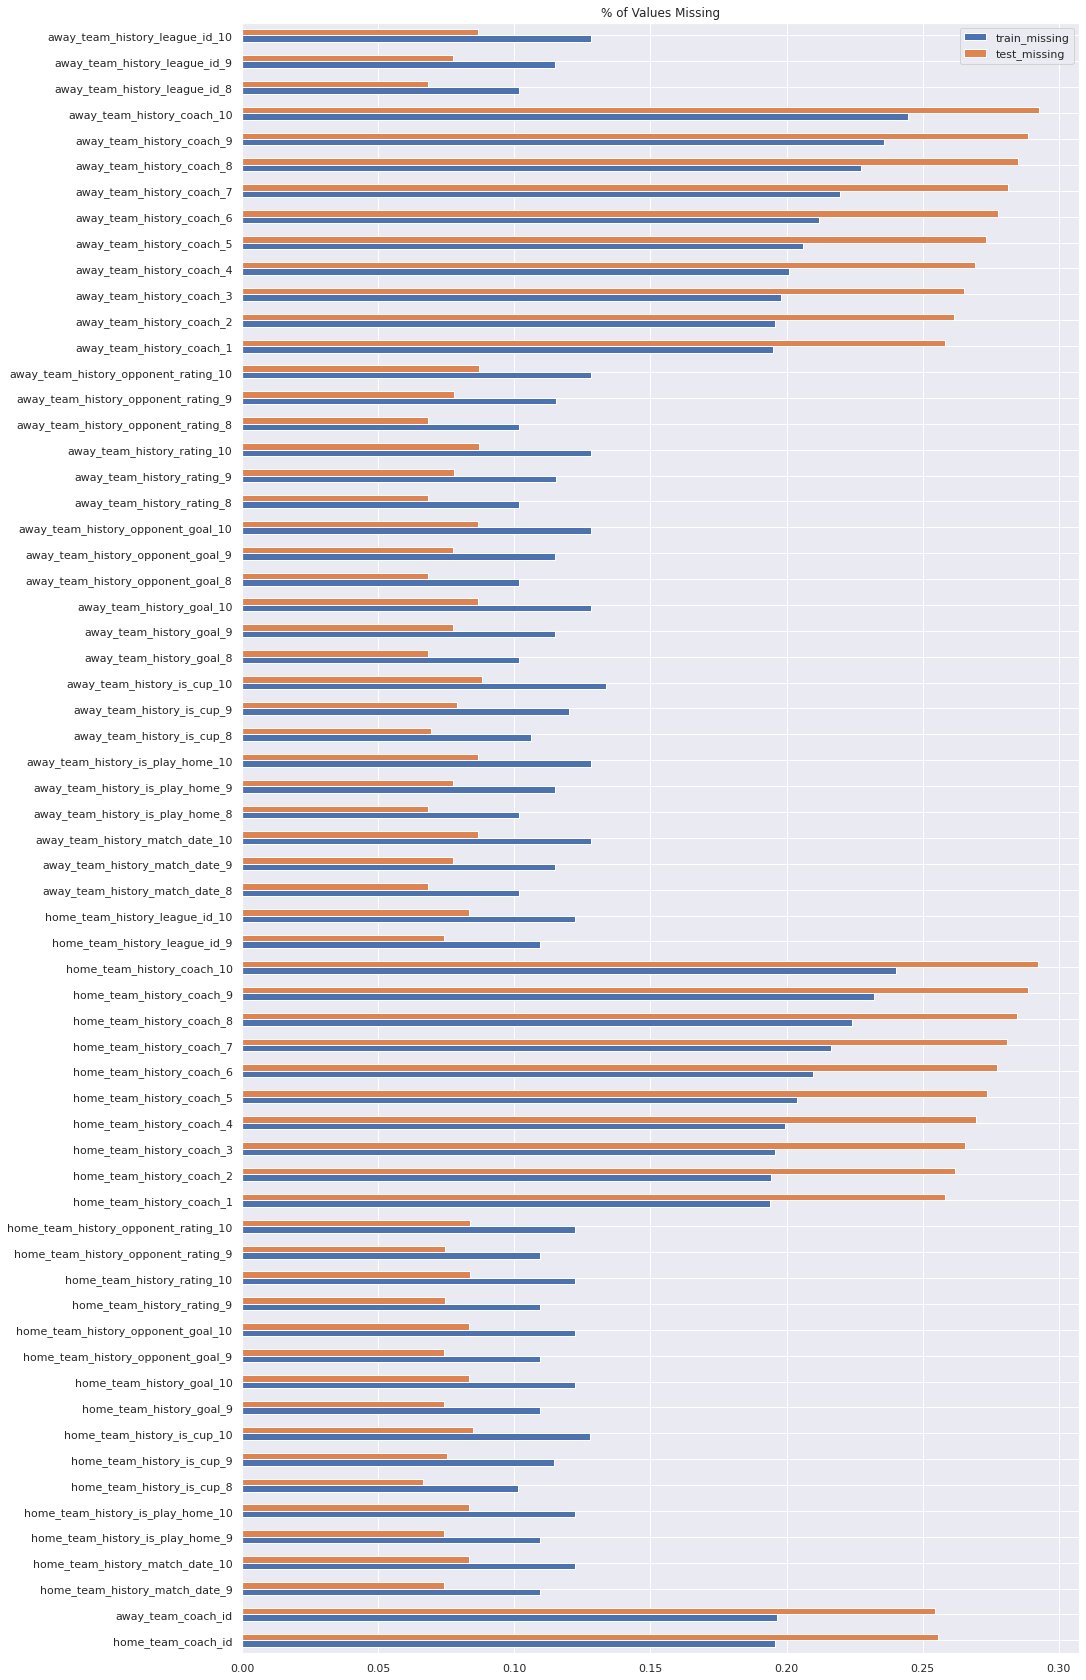

In [85]:
# train과 test set 내 missing value 비율 확인
count_missing = pd.DataFrame([train.isna().mean(),test.isna().mean()]).T
count_missing = count_missing.rename(columns={0: "train_missing", 1: "test_missing"})

# missing value 가 30%를 넘지 않으므로 missing value 가 10~30% 사이인 컬럼들만 그래프화
count_missing.query("train_missing > 0.1 and train_missing < 0.3").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")

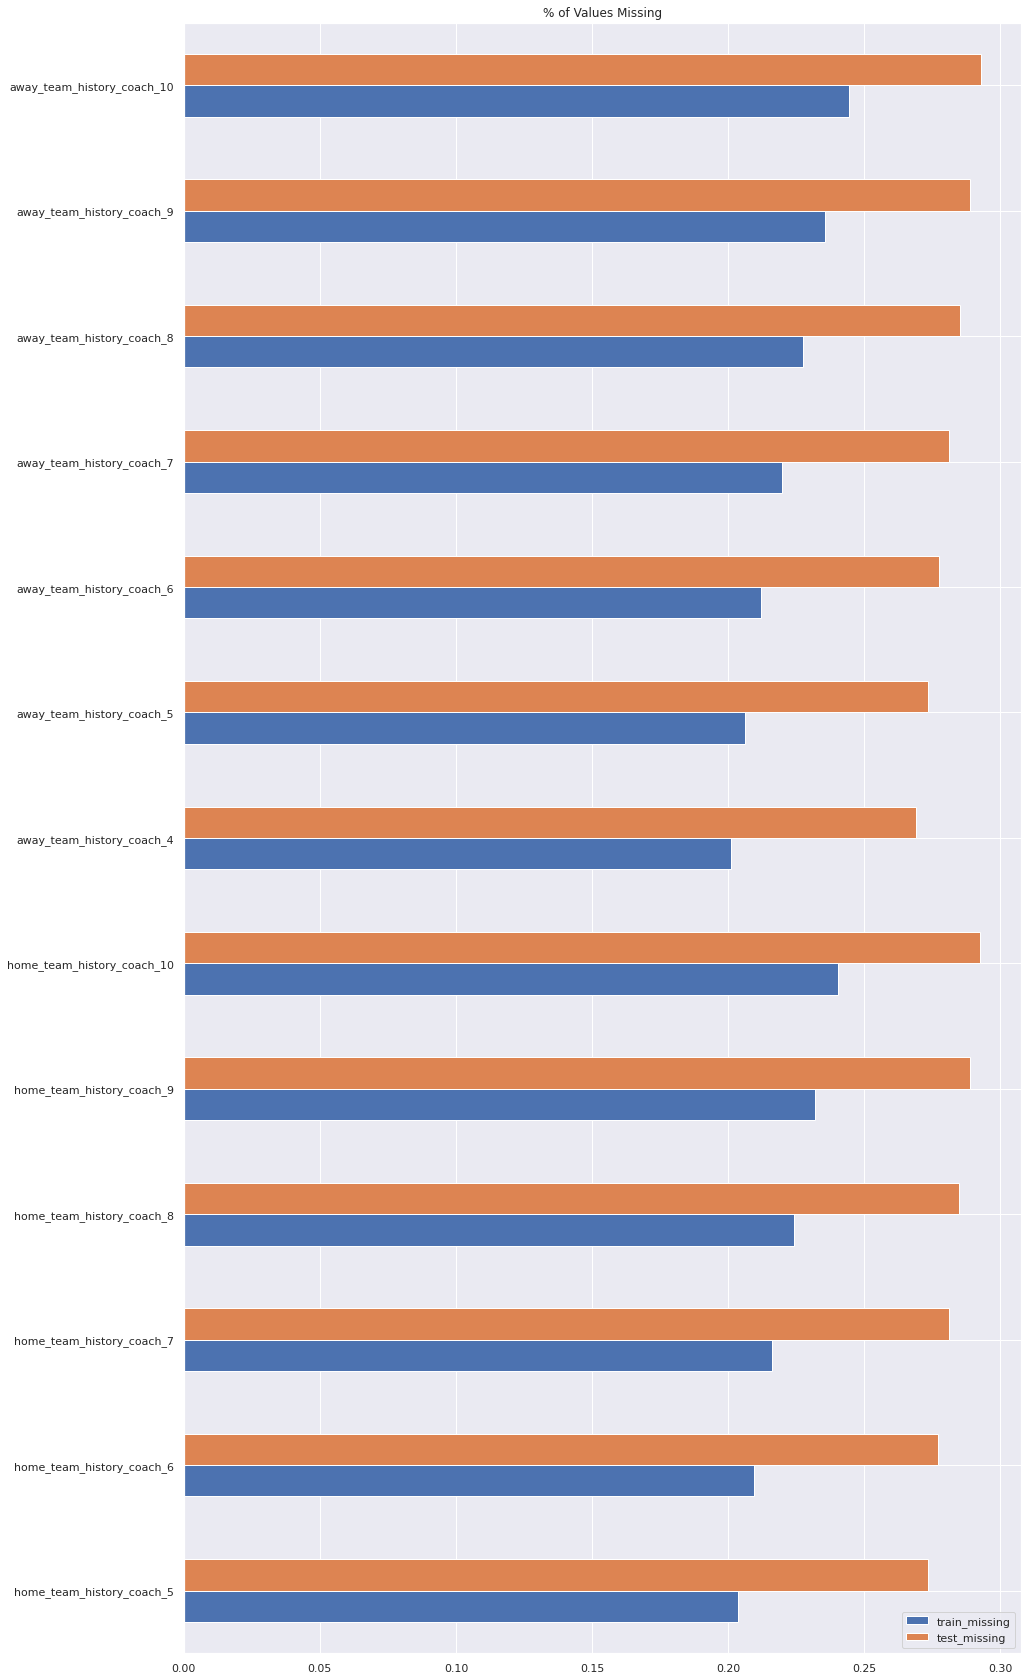

In [86]:
count_missing.query("train_missing > 0.2 and train_missing < 0.3").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")

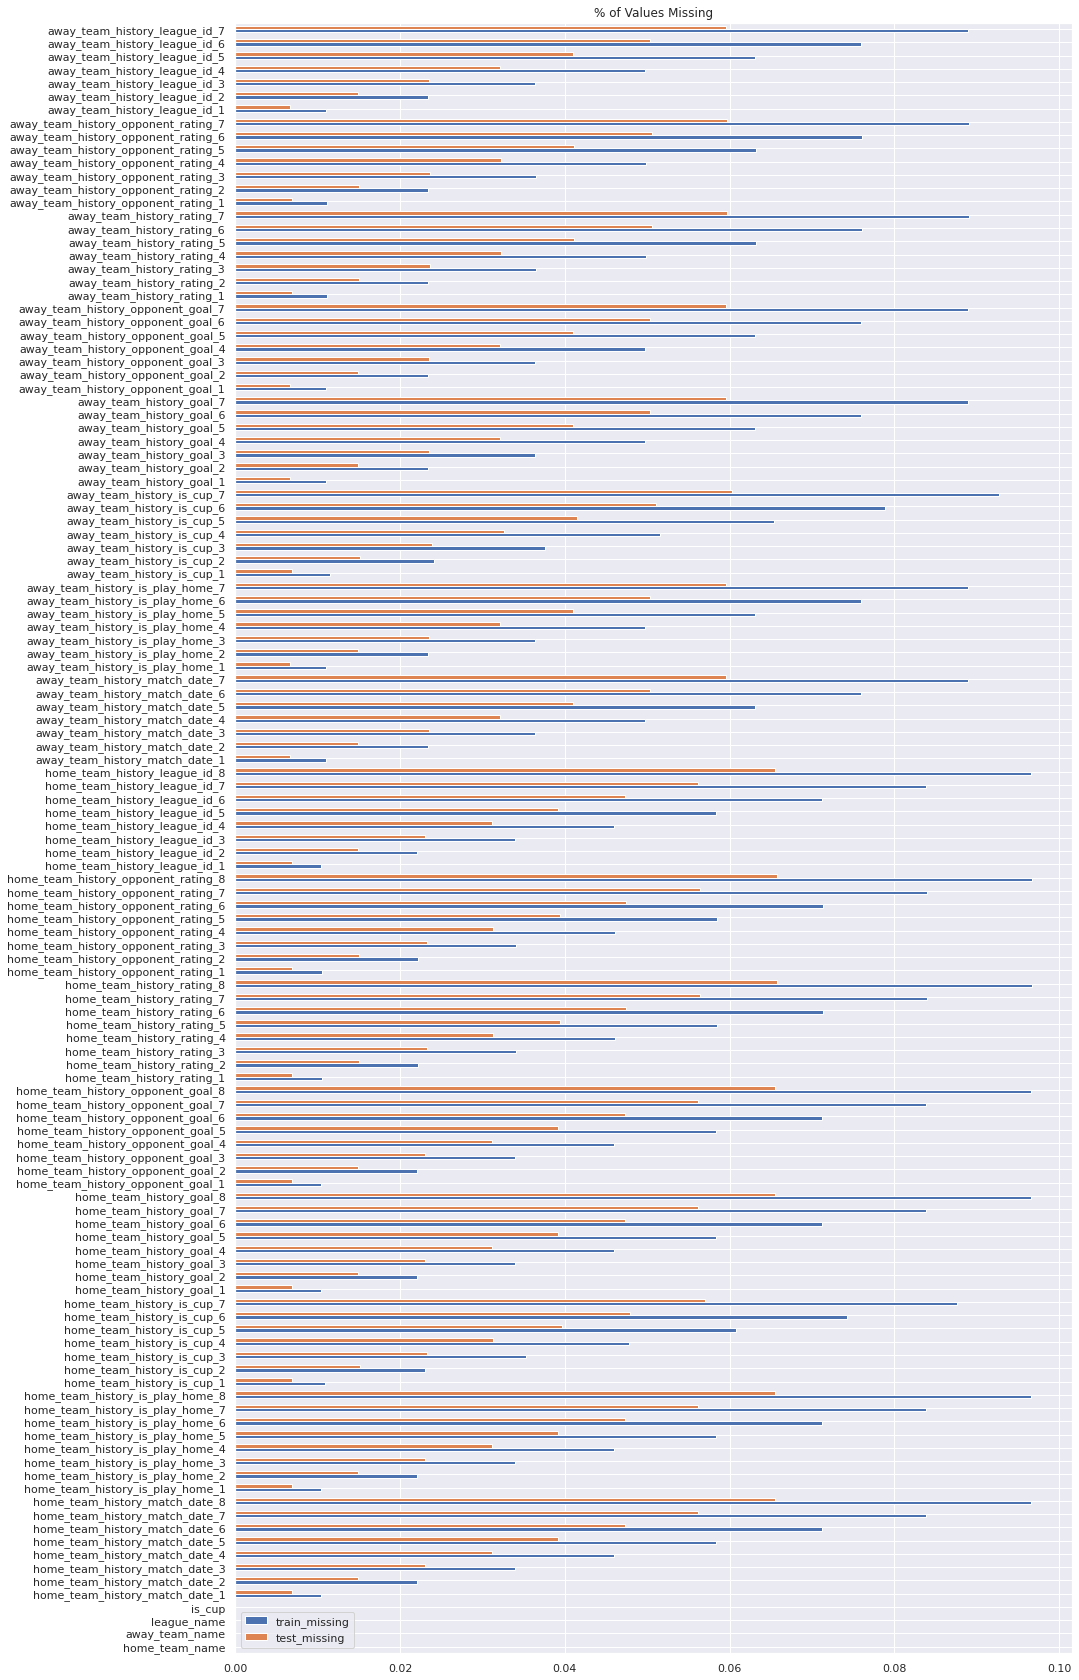

In [87]:
count_missing.query("train_missing > 0 and train_missing < 0.1").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")

## Step 2. EDA 및 데이터 기초 통계 분석


### 1. Target



The data balance does not seem to be an issue at the moment, we will work with the data as is, as per cross validation make a decision of upsampling.

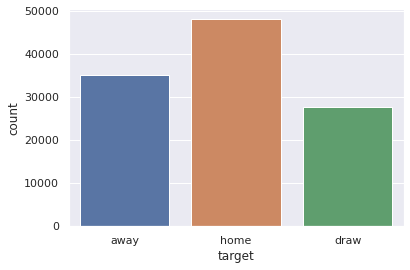

In [88]:
sns.set_theme(style="darkgrid")
sns.countplot(x="target",data=train)

### 2. home & away name

* Home team has 9813 unique team names whereas away team has 9892 unique team names
* Top 5 teams in both home and away team name columns are the same.
* Rangers from the home team column seems to have the highest home wins
* River plate from the away team feature seems to have highest away wins


In [89]:
print(train["home_team_name"].nunique())
train["home_team_name"].value_counts()

9813


Al Ittihad          91
River Plate         71
Rangers             64
Liverpool           63
Al Ahli             62
                    ..
Atlético GO U20      1
Cray Valley (PM)     1
Worcester City       1
Velke Lovce          1
EB / Streymur II     1
Name: home_team_name, Length: 9813, dtype: int64

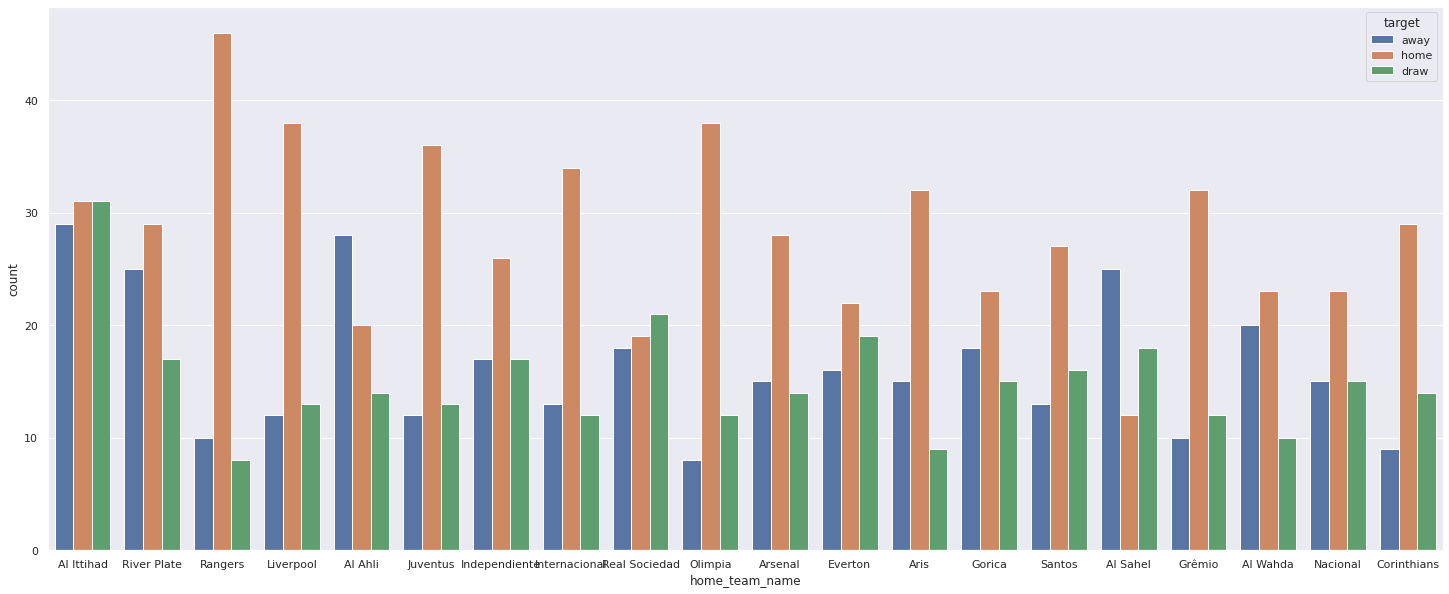

In [90]:
plt.figure(figsize=(25,10))
sns.countplot(x="home_team_name",hue="target",data=train,order=train.home_team_name.value_counts().iloc[:20].index)

In [91]:
print(train["away_team_name"].nunique())
train["away_team_name"].value_counts()

9892


Al Ittihad              82
River Plate             77
Liverpool               65
Rangers                 64
Al Ahli                 64
                        ..
Hlinsko                  1
Tatran Rakovnik          1
Makedonikos Foufas       1
Hohenstein-Ernstthal     1
Úlfarnir                 1
Name: away_team_name, Length: 9892, dtype: int64

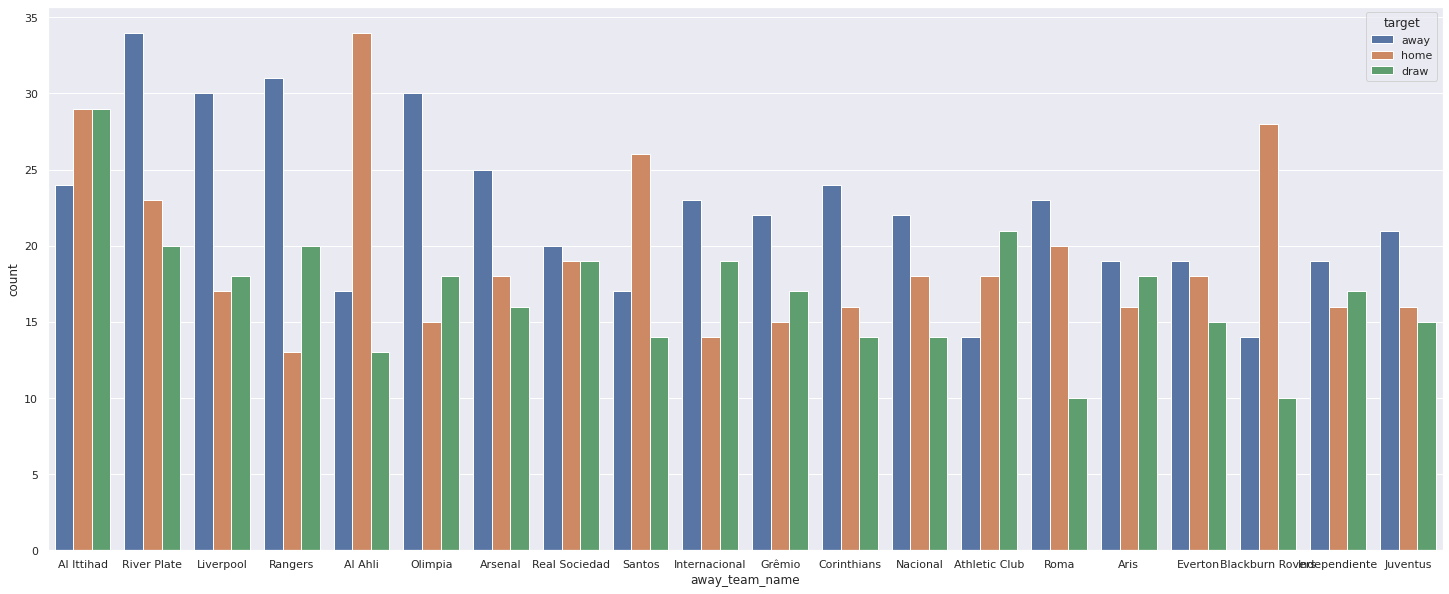

In [92]:
plt.figure(figsize=(25,10))
sns.countplot(x="away_team_name",hue="target",data=train,order=train.away_team_name.value_counts().iloc[:20].index)

In [93]:
!pip install wordcloud

In [94]:
home_team = ''
for word in train["home_team_name"]:
    home_team += str(word) + ' ' + ','

In [95]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(home_team)

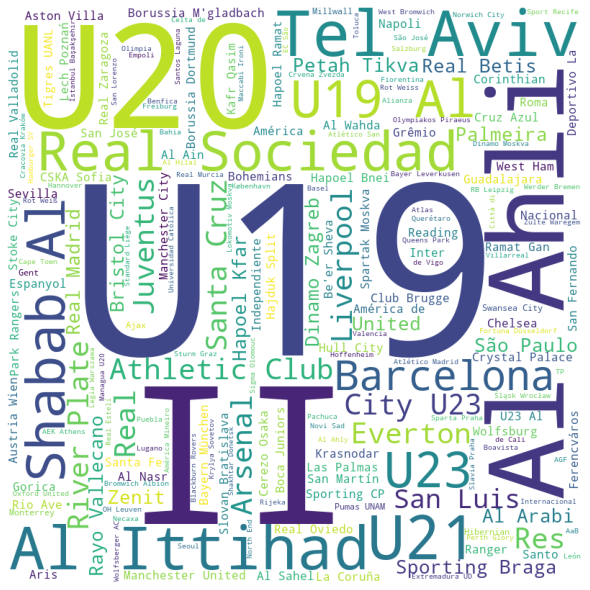

In [96]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

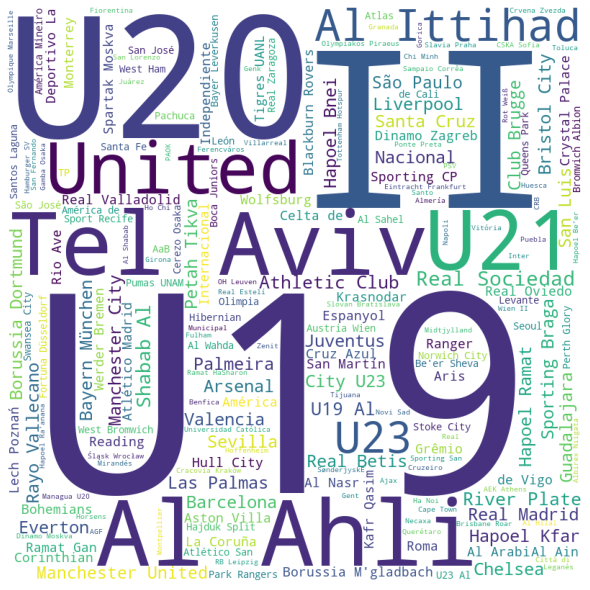

In [97]:
away_team = ''
for word in train["away_team_name"]:
    away_team += str(word) + ' ' + ','
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                
                min_font_size = 10).generate(away_team)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### 3. Is Cup

* 대부분의 경기는 컵대회가 아닌 일반 리그경기.
* 컵대회에는 국가대표 경기도 포함되어있음



In [98]:
train[train['is_cup'] == True].head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
51,11977834,home,Thailand U23,Singapore U23,2019-12-01 08:00:00,Southeast Asian Games,1729,True,21781034.0,7392425.0,2019-11-28 08:00:00,2019-11-26 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,11977835,home,Laos U23,Brunei U23,2019-12-01 08:00:00,Southeast Asian Games,1729,True,1565668.0,37252510.0,2019-11-28 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.706175,8.689950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.746250,32.670500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37252510.0,37252510.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1729.0,1729.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,11977836,home,Vietnam U23,Indonesia U23,2019-12-01 12:00:00,Southeast Asian Games,1729,True,474249.0,474672.0,2019-11-28 08:00:00,2019-11-25 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.596580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.956350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,474672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1729.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,11981630,draw,Motema Pembe,Zanaco,2019-12-01 13:00:00,CAF Confederations Cup,1108,True,37369270.0,896294.0,2019-10-27 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.287938,13.362783,4.507538,4.580550,12.641950,8.574500,3.820869,5.454415,8.102020,5.981830,6.425588,2.744633,4.404763,5.153843,3.445917,2.51495,6.826337,5.017790,2.770130,4.056490,NaN,8

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


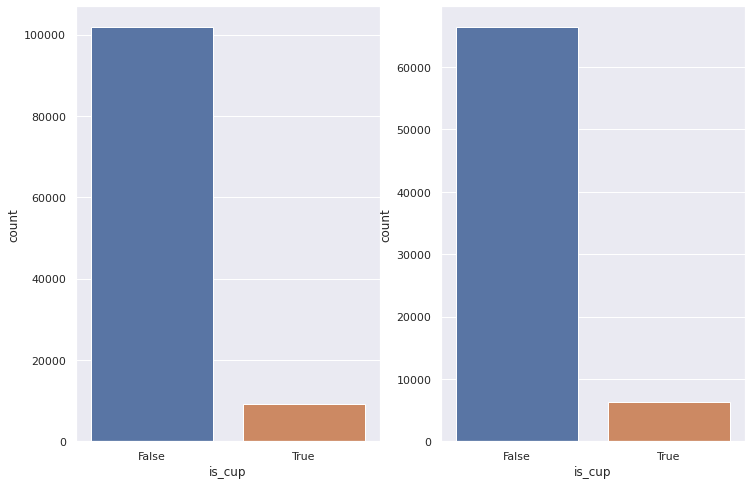

In [99]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12,8)
sns.countplot(train["is_cup"], ax = ax1)
sns.countplot(test["is_cup"], ax = ax2)

In [100]:
train[train['is_cup'] == True].league_name.value_counts()[:15]

FA Cup                    462
Europa League             435
Fa Trophy                 241
Copa Del Rey              240
Sao Paolo Youth Cup       233
League Cup                223
Copa Libertadores         217
Champions League          213
AFC Champions League      181
Serie D                   175
Copa do Brasil            170
Turkish Cup               167
Copa Sudamericana         166
CAF Confederations Cup    166
UEFA Nations League       161
Name: league_name, dtype: int64

In [101]:
train[(train['is_cup'] == True)& (train['league_name'] == 'FA Cup')].head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
434,11982996,home,Peterborough United,Dover Athletic,2019-12-01 14:00:00,FA Cup,24,True,455607.0,896490.0,2019-11-23 15:00:00,2019-11-19 19:45:00,2019-11-12 19:30:00,2019-11-09 15:00:00,2019-11-05 19:45:00,2019-11-02 15:00:00,2019-10-26 14:00:00,2019-10-23 18:45:00,2019-10-19 14:00:00,2019-10-12 14:00:00,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.615150,6.06795,5.339700,6.383207,5.294025,7.216186,7.587350,7.110050,6.716786,6.508100,4.220836,6.06795,6.572400,7.135957,6.808079,5.265114,4.784100,4.960158,5.624279,5.480650,896490.0,896490.0,896490.0,896490.0,896490.0,896490.0,896490.0,896490.0,896490.0,896490.0,17.0,17.0,17.0,24.0,17.0,17.0,17.0,24.0,17.0,17.0
439,11981423,home,Blackpool,Maidstone United,2019-12-01 14:00:00,FA Cup,24,True,523984.0,896535.0,2019-11-27 19:45:00,2019-11-23 15:00:00,2019-11-16 15:00:00,2019-11-09 15:00:00,2019-11-05 19:45:00,2019-11-02 15:00:00,2019-10-26 14:00:00,2019-10-22 18:45:00,2019-10-15 18:45:00,2019-10-12 14:00:00,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,5.609712,7.37897,6.284558,4.955710,7.234590,6.494119,6.668075,9.527517,5.582093,11.995675,6.915075,5.53330,6.476725,7.778753,6.678120,6.481878,5.709625,3.964875,7.313407,5.281825,896535.0,896535.0,896535.0,896535.0,896535.0,896535.0,896535.0,896535.0,896535.0,896535.0,30.0,30.0,1092.0,24.0,1092.0,1092.0,1092.0,24.0,1092.0,24.0
440,11981428,away,Crawley Town,Fleetwood Town,2019-12-01 14:00:00,FA Cup,24,True,22877956.0,658.0,2019-11-23 15:00:00,2019-11-16 15:00:00,2019-11-12 19:45:00,2019-11-09 15:00:00,2019-11-02 15:00:00,2019-10-29 19:45:00,2019-10-26 14:00:00,2019-10-22 18:45:00,2019-10-19 14:00:00,2019-10-12 14:00:00,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1

### 4. League name & Leauge id
* 하나의 `league_name`에 여려 id가 붙는 현상 존재  
ex) Premier Leaugue 34개 id. 
* `leauge_id` 하나에 2개씩 리그명이 붙는 경우 존재 (18건)
* 구글링 결과 2개 리그는 동일 리그로 판단됨.  
  ex) id 199 는 Premier League / Vysshaya Liga 두개가 존재하지만, 모두 벨라루스 프리미어리그로 보임.   
  하지만, `league_name` 이 Premier League라도 `id`가 8이면 English Premier Leage로 보이며, `id`가 199면 Belarusian Premier League로 서로 다른 리그로 판단됨. 
* 따라서 `league_name` 보다 `leauge_id`만 사용하면 될것으로 보임.


727
Premier League         5565
Club Friendlies        3724
Primera Division       2369
Super League           1530
3. Liga                1327
                       ... 
Play-offs 2/3             1
Trofeo Joan Gamper        1
4. Liga Division F        1
Copa Paraguay             1
National 3: Group L       1
Name: league_name, Length: 727, dtype: int64


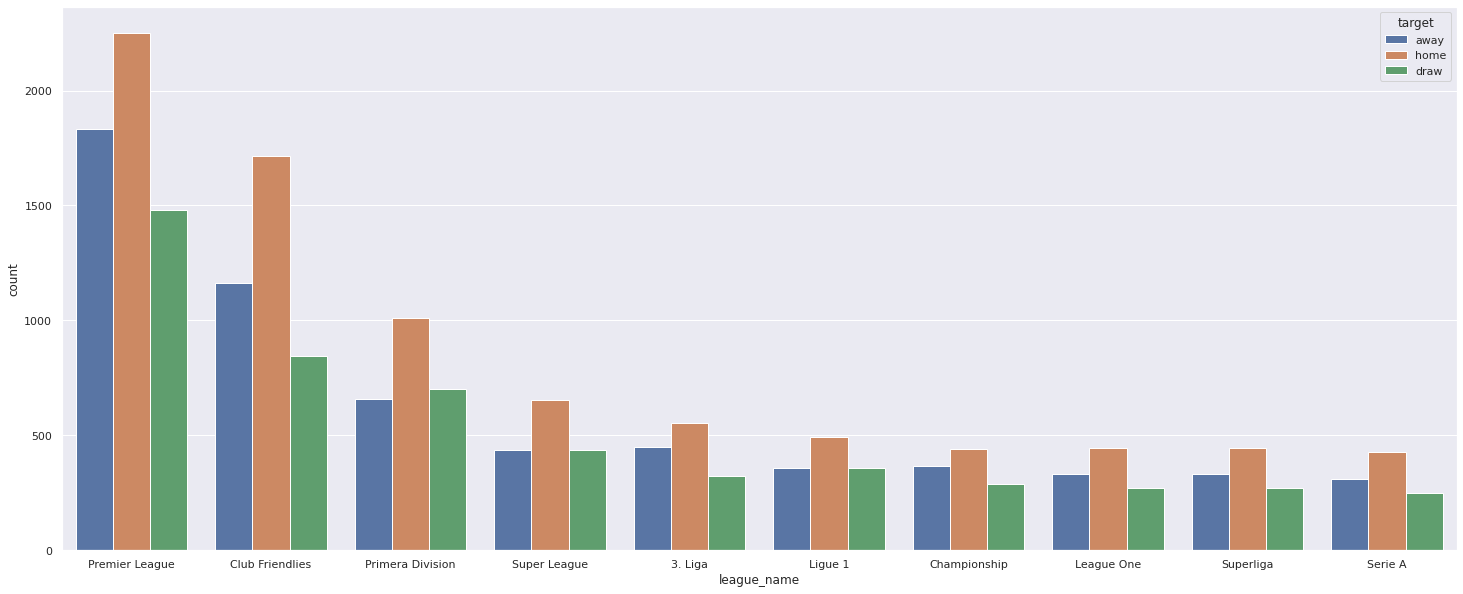

In [102]:
print(train["league_name"].nunique())
print(train["league_name"].value_counts())
plt.figure(figsize=(25,10))
sns.countplot(x="league_name",hue="target",data=train,order=train.league_name.value_counts().iloc[:10].index)

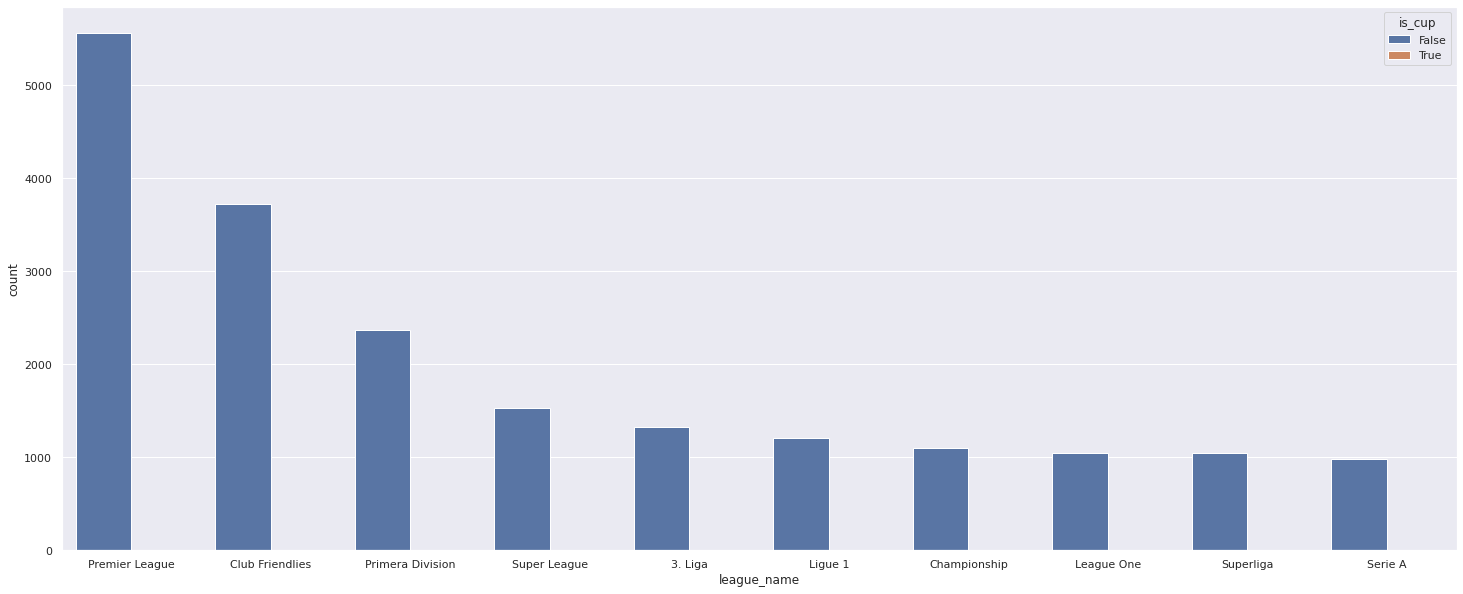

In [103]:
plt.figure(figsize=(25,10))
sns.countplot(x="league_name",hue="is_cup",data=train,order=train.league_name.value_counts().iloc[:10].index)

In [104]:
pd.DataFrame(train.groupby(['league_name','league_id']).size(), columns = ['cnt']).reset_index()['league_name'].value_counts()

Premier League      34
Super Cup           24
Primera Division     9
Women's Cup          7
Super League         7
                    ..
Emir Cup             1
Emperor Cup          1
Eredivisie           1
Eredivisie Cup       1
Ýokary Liga          1
Name: league_name, Length: 727, dtype: int64

In [105]:
pd.DataFrame(train['league_id'].groupby(train['league_name']).nunique()).sort_values(by='league_id', ascending = False)[:10]

,league_id
league_name,
Premier League,34
Super Cup,24
Primera Division,9
Women's Cup,7
Super League,7
Ligue 1,6
FA Cup,6
League Cup,5
U19 League,5


In [106]:
train[train['league_name']=='Premier League'].head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
31,11954687,away,Happy Valley,Southern District,2019-12-01 06:30:00,Premier League,1001,False,37288526.0,1552671.0,2019-11-23 06:30:00,2019-11-03 06:30:00,2019-10-20 06:30:00,2019-09-15 06:30:00,2019-08-30 12:00:00,2019-05-12 07:30:00,2019-04-28 07:30:00,2019-04-21 05:30:00,2019-04-14 05:30:00,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,5.246940,7.344475,6.431789,8.225714,8.332793,13.730950,5.602948,12.464931,8.512693,10.381235,6.286270,6.218950,10.004017,5.158029,5.523486,4.193831,8.272064,4.560724,5.330874,5.763657,1552671.0,1552671.0,1552671.0,1552671.0,1552671.0,1552671.0,1552671.0,1552671.0,1552671.0,1552671.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1528.0,1001.0,1528.0,1001.0
32,11954688,home,Warriors,Wofoo Tai Po,2019-12-01 06:30:00,Premier League,1001,False,4192212.0,18227539.0,2019-11-23 06:30:00,2019-11-02 06:30:00,2019-10-20 06:30:00,2019-09-15 06:30:00,2019-09-01 06:30:00,2019-05-19 06:30:00,2019-05-05 09:30:00,2019-04-20 06:30:00,2019-04-05 09:30:00,2019-03-30 09:30:00,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14.353945,10.196931,5.573033,6.506033,8.275030,4.991683,10.215422,5.942975,13.049632,3.704325,3.979940,7.510492,9.239533,7.338600,6.040678,10.107081,6.079533,8.300173,4.529905,13.740462,18227539.0,18227539.0,18227539.0,313876.0,313876.0,313876.0,1552691.0,1552691.0,1552691.0,1552691.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1088.0,1088.0,1001.0,1088.0
60,11954689,away,Pegasus,Eastern,2019-12-01 09:30:00,Premier League,1001,False,313388.0,1552691.0,2019-11-25 12:00:00,2019-11-04 11:30:00,2019-10-20 06:30:00,2019-09-28 06:30:00,2019-09-16 12:00:00,2019-09-01 06:30:00,2019-05-19 06:30:00,2019-05-04 06:30:00,2019-04-20 06:30:00,2019-04-0

In [107]:
train[train['home_team_name']=='Liverpool'].head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
1091,11867375,home,Liverpool,Everton,2019-12-04 20:15:00,Premier League,8,False,455353.0,455424.0,2019-11-30 15:00:00,2019-11-27 20:00:00,2019-11-23 15:00:00,2019-11-10 16:30:00,2019-11-05 20:00:00,2019-11-02 15:00:00,2019-10-30 19:30:00,2019-10-27 16:30:00,2019-10-23 19:00:00,2019-10-20 15:30:00,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,4.655205,9.394130,6.092408,5.806454,7.396673,5.581754,7.414920,5.622056,3.714675,7.824317,7.846880,4.225720,5.809065,6.211146,4.317216,5.588065,5.029470,4.999211,11.290408,4.709464,455424.0,455424.0,455424.0,455424.0,455424.0,455424.0,455424.0,455424.0,455424.0,455424.0,8.0,8.0,8.0,8.0,27.0,8.0,8.0,8.0,8.0,27.0
1178,11967659,away,Liverpool,River Plate,2019-12-05 20:00:00,Primera Division,770,False,468866.0,474327.0,2019-11-27 20:00:00,2019-11-22 19:30:00,2019-11-16 19:00:00,2019-11-10 19:00:00,2019-11-07 19:00:00,2019-11-03 19:00:00,2019-10-25 22:30:00,2019-10-20 19:00:00,2019-10-17 19:00:00,2019-10-10 23:00:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.129608,6.925980,5.836094,3.734614,6.143256,6.039167,4.715388,6.639083,5.890163,6.265541,4.029992,5.528120,5.651044,7.684343,5.840422,6.316658,7.923819,6.018967,6.033762,5.879118,474327.0,474327.0,474327.0,474327.0,474327.0,474327.0,474327.0,474327.0,474327.0,474327.0,770.0,770.0,770.0,770.0,770.0,770.0,770.0,770.0,770.0,770.0
3118,11867391,home,Liverpool,Watford,2019-12-14 12:30:00,Premier League,8,False,455353.0,896553.0,2019-12-10 17:55:00,2019-12-07 15:00:00,2019-12-04 20:15:00,2019-11-30 15:00:00,2019-11-27 20:00:00,2019-11-23 15:00:00,2019-11-10 16:30:00,2019-11-05 20:00:00,2019-11-02 15:00:00,2019-10-30 19:30:00,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1

In [108]:
a = pd.DataFrame(train['league_name'].groupby(train['league_id']).nunique().sort_values(ascending=False))
a[a['league_name'] > 1]

,league_name
league_id,
262,2
334,2
588,2
1573,2
69,2
672,2
45,2
678,2
1034,2


In [109]:
a[a['league_name'] > 1].index

Int64Index([ 262,  334,  588, 1573,   69,  672,   45,  678, 1034,  235, 1809,
            1695,   17,  199, 1639, 1043,  749,  585],
           dtype='int64', name='league_id')

In [110]:
a = pd.DataFrame(train.groupby(['league_id','league_name']).size()).reset_index()
a[a['league_id'] == 334]

,league_id,league_name,0
115,334,NB 1,66
116,334,OTP Bank Liga,238


In [111]:
a.loc[(a['league_id'] == 262) | (a['league_id'] == 334) | (a['league_id'] == 588) | (a['league_id'] == 1573) | (a['league_id'] == 69) | (a['league_id'] == 672) | (a['league_id'] == 45) | (a['league_id'] == 678) | (a['league_id'] == 1034) | (a['league_id'] == 235) | (a['league_id'] == 1809) | (a['league_id'] == 1695) | (a['league_id'] == 17) | (a['league_id'] == 199) | (a['league_id'] == 1639) | (a['league_id'] == 1043) | (a['league_id'] == 749) | (a['league_id'] == 585)]

,league_id,league_name,0
6,17,National League,404
7,17,Vanarama National League,171
17,45,Women's Super League,40
18,45,Wsl 1 Women,124
28,69,Non League Premier: Southern,296
29,69,Non League Premier: Southern Central,96
70,199,Premier League,15
71,199,Vysshaya Liga,252
82,235,B PFG,37
83,235,Vtora Liga,196


### 4. Coach Id
* 아직 의미나 활용가능성에 대해 알 수 없음...

8804
37252510.0    4455
2511092.0       49
524307.0        48
7862.0          46
455357.0        46
              ... 
37524413.0       1
1552968.0        1
20336125.0       1
37455116.0       1
86159.0          1
Name: home_team_coach_id, Length: 8804, dtype: int64


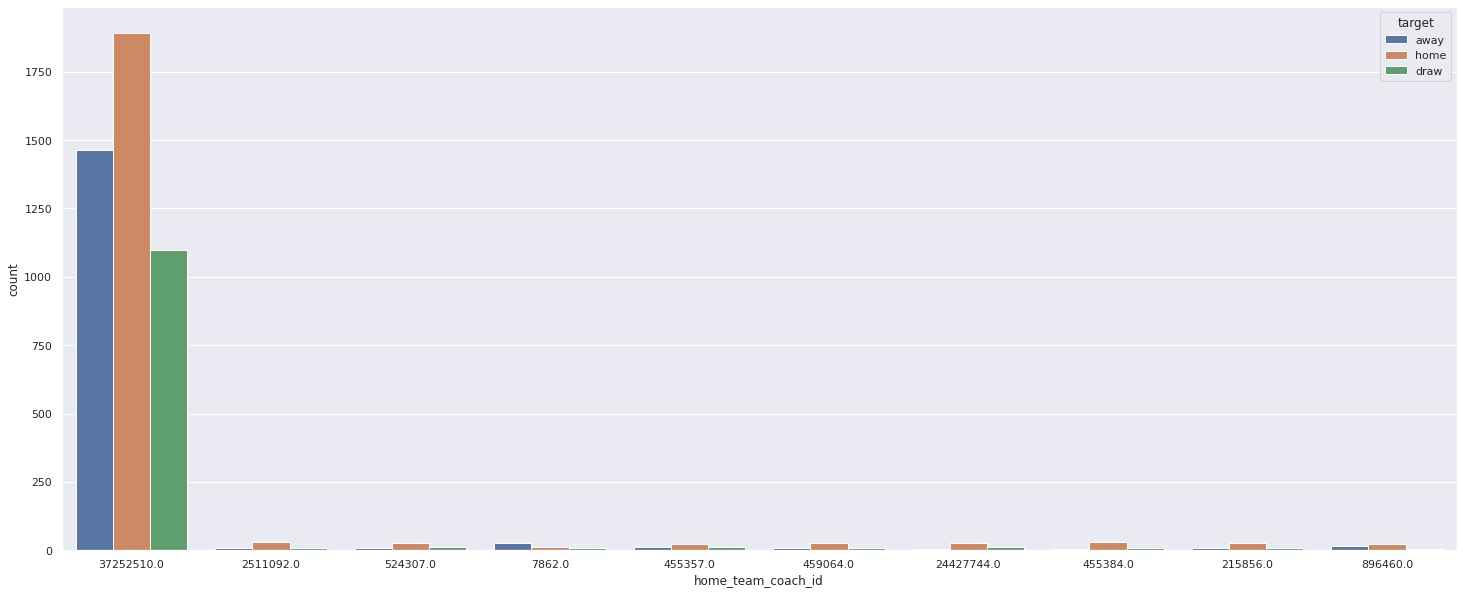

In [112]:
print(train["home_team_coach_id"].nunique())
print(train["home_team_coach_id"].value_counts())
plt.figure(figsize=(25,10))
sns.countplot(x="home_team_coach_id",hue="target",data=train,order=train.home_team_coach_id.value_counts().iloc[:10].index)

8938
37252510.0    4512
455361.0        49
524307.0        47
466541.0        47
2511092.0       45
              ... 
525060.0         1
534241.0         1
37553957.0       1
37553867.0       1
37567817.0       1
Name: away_team_coach_id, Length: 8938, dtype: int64


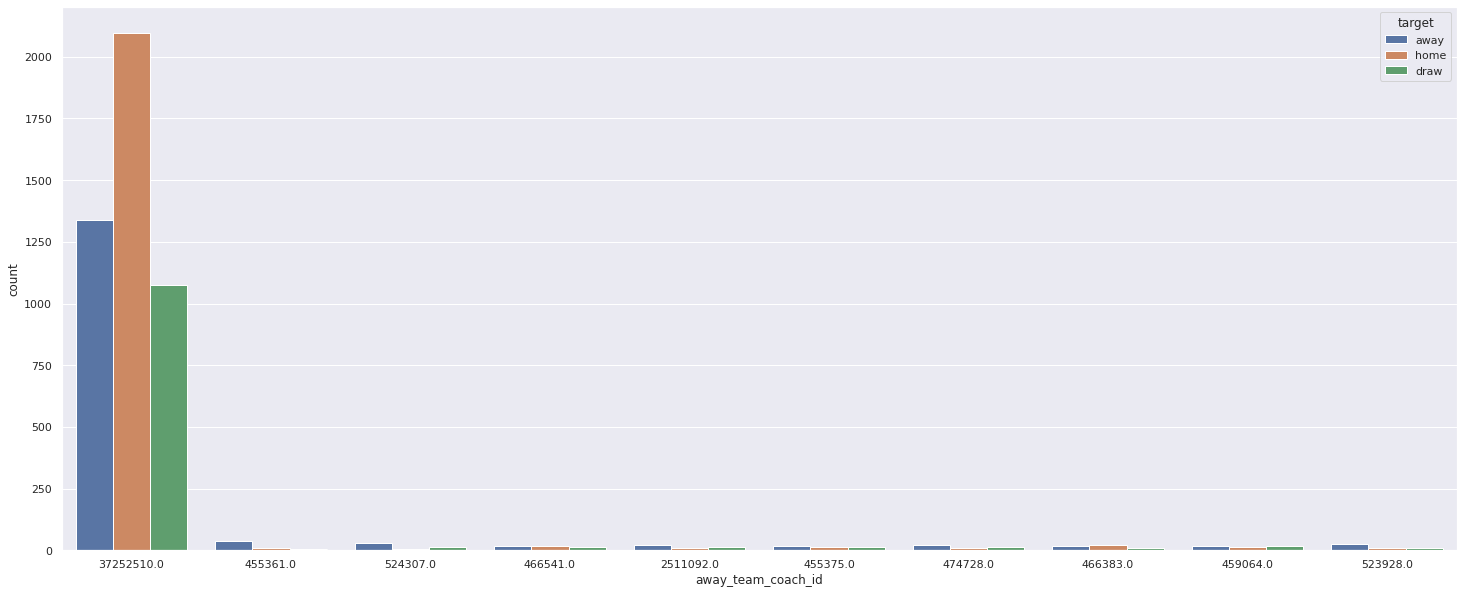

In [113]:
print(train["away_team_coach_id"].nunique())
print(train["away_team_coach_id"].value_counts())
plt.figure(figsize=(25,10))
sns.countplot(x="away_team_coach_id",hue="target",data=train,order=train.away_team_coach_id.value_counts().iloc[:10].index)

### 5. Match Date
* 경기는 2019년 12월 ~ 2021년 4월까지 데이터  
(21년 5월은 5월 1일 하루만 존재)
* 20년 4월에는 경기가 32건만 존재. 코로나로 인해 경기가 뒤로 밀린것으로 보임  
(실제로 19/20시즌 EPL의 경우 4월에 경기가 취소되고 7월까지 리그경기가 진행됨)
* 경기시간은 UTC기준 13시가 가장 많고 대체로 낮시간에 경기가 많음

In [114]:
print(min(train['match_date']), "/", max(train['match_date']))

2019-12-01 00:45:00 / 2021-05-01 00:00:00


In [115]:
train['m_date'] = pd.to_datetime(train['match_date'])

In [116]:
train['match_date_yr'] = train['m_date'].dt.year
train['match_date_mo'] = train['m_date'].dt.month
train['match_date_dy'] = train['m_date'].dt.day
train['match_date_hr'] = train['m_date'].dt.hour

Text(0.5, 0, 'Match Date (Year, Month)')

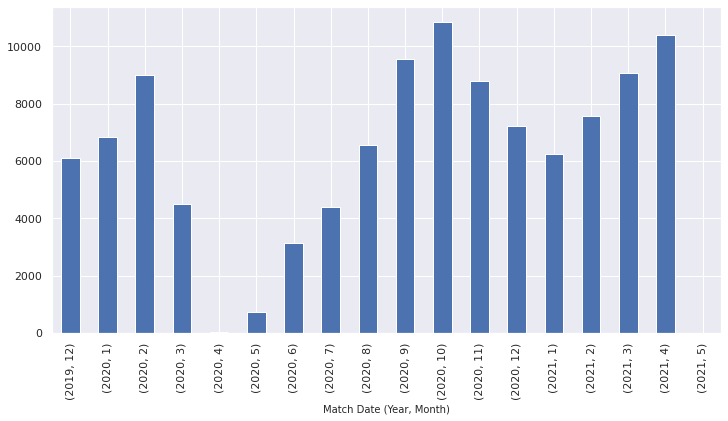

In [117]:
plt.figure(figsize=(12,6))
train.groupby(['match_date_yr', 'match_date_mo']).size().plot(kind="bar").set_xlabel("Match Date (Year, Month)", fontsize=10)


In [118]:
train[(train['match_date_yr'] == 2020) & (train['match_date_mo'] == 4)]

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,...,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10,m_date,match_date_yr,match_date_mo,match_date_dy,match_date_hr
26431,12031504,draw,Rukinzo,Musongati,2020-04-03 11:30:00,Ligue A,1811,False,NaN,NaN,2020-03-21 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.042450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-03 11:30:00,2020,4,3,11
26432,12031505,draw,Inter Star,Ngozi City,2020-04-03 14:00:00,Ligue A,1811,False,NaN,NaN,2020-03-22 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.948250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-03 14:00:00,2020,4,3,14
26433,12031506,draw,Vital'O,Le Messager Ngozi,2020-04-04 11:30:00,Ligue A,1811,False,NaN,NaN,2020-03-22 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.932800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-04 11:30:00,2020,4,4,11
26434,12031509,draw,Bujumbura City,Bumamuru,2020-04-05 11:30:00,Ligue A,1811,False,NaN,NaN,2020-03-21 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.786300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-05 11:30:00,2020,4,5,11
26435,12031511,home,Dynamik,Aigle Noir,2020-04-05 14:00:00,Ligue A,1811,False,NaN,NaN,2020-03-21 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Na

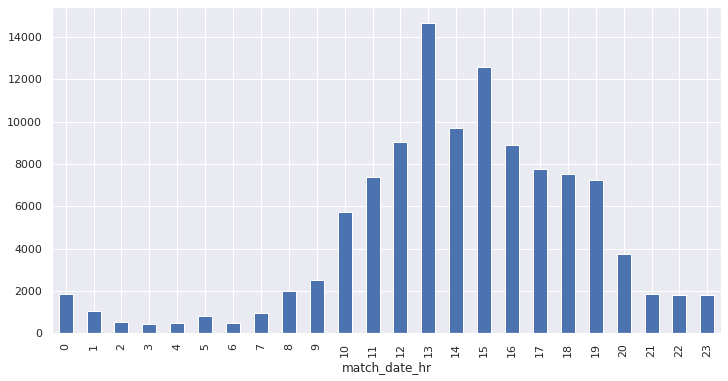

In [119]:
plt.figure(figsize=(12,6))
train.groupby(['match_date_hr']).size().plot(kind="bar")

### 6. Hometeam Historical Features
1. 홈팀 최근 i번째 경기 결과 (i번째경기 홈팀 득점 - 원정팀 득점) 
 - (최근 경기결과가 영향을 끼치지 않을까?)
2. rate_difference : i번째 경기 홈팀과 원정팀 rating 차 (두 팀간 실력 차이 측정) 
 - (아무래도 실력차이가 크면 큰팀이 유리하지 않을까?)
3. 경기간격 : 홈팀 최근 i번째 경기일자 - 홈팀 최근 i+1번째 경기일자 
 - (아무래도 경기간격이 짧을수록 체력적으로 힘들기때문에 경기에 영향이 있지 않을까?)
4. 연속홈경기 여부 : 최근 i번째 I+1번째 ... i+n번째 연속 홈경기 여부 
 - (아무래도 연속 홈경기일경우 체력적으로 유리하지않을까?)
